In [5]:
# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing tools
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine learning models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics and model evaluation
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)

# Utilities for model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# Clustering and dimensionality reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Deep learning with TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


In [6]:
df = pd.read_csv('Road Accident Data.csv')

In [7]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,01/01/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,01/05/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,01/04/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,01/05/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,01/06/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [8]:
df.dtypes

Accident_Index                 object
Accident Date                  object
Day_of_Week                    object
Junction_Control               object
Junction_Detail                object
Accident_Severity              object
Latitude                      float64
Light_Conditions               object
Local_Authority_(District)     object
Carriageway_Hazards            object
Longitude                     float64
Number_of_Casualties            int64
Number_of_Vehicles              int64
Police_Force                   object
Road_Surface_Conditions        object
Road_Type                      object
Speed_limit                     int64
Time                           object
Urban_or_Rural_Area            object
Weather_Conditions             object
Vehicle_Type                   object
dtype: object

In [9]:
df.nunique()

Accident_Index                197644
Accident Date                    730
Day_of_Week                        7
Junction_Control                   7
Junction_Detail                    9
Accident_Severity                  4
Latitude                      264362
Light_Conditions                   5
Local_Authority_(District)       422
Carriageway_Hazards                6
Longitude                     269856
Number_of_Casualties              28
Number_of_Vehicles                17
Police_Force                      51
Road_Surface_Conditions            5
Road_Type                          5
Speed_limit                        8
Time                            1439
Urban_or_Rural_Area                2
Weather_Conditions                 8
Vehicle_Type                      15
dtype: int64

In [10]:
df.isnull().sum()

Accident_Index                   0
Accident Date                    0
Day_of_Week                      0
Junction_Control                 0
Junction_Detail                  0
Accident_Severity                0
Latitude                         0
Light_Conditions                 0
Local_Authority_(District)       0
Carriageway_Hazards              3
Longitude                        0
Number_of_Casualties             0
Number_of_Vehicles               0
Police_Force                     0
Road_Surface_Conditions        317
Road_Type                     1534
Speed_limit                      0
Time                            17
Urban_or_Rural_Area              0
Weather_Conditions            6057
Vehicle_Type                     0
dtype: int64

In [11]:
df['Vehicle_Type'].unique()

array(['Car', 'Taxi/Private hire car', 'Motorcycle over 500cc',
       'Van / Goods 3.5 tonnes mgw or under',
       'Goods over 3.5t. and under 7.5t', 'Motorcycle 125cc and under',
       'Motorcycle 50cc and under',
       'Bus or coach (17 or more pass seats)',
       'Goods 7.5 tonnes mgw and over', 'Other vehicle',
       'Motorcycle over 125cc and up to 500cc', 'Agricultural vehicle',
       'Minibus (8 - 16 passenger seats)', 'Pedal cycle', 'Ridden horse'],
      dtype=object)

In [12]:
vehicle_types = ['Car', 'Taxi/Private hire car', 'Motorcycle over 500cc',
                 'Van / Goods 3.5 tonnes mgw or under',
                 'Goods over 3.5t. and under 7.5t', 'Motorcycle 125cc and under',
                 'Motorcycle 50cc and under',
                 'Bus or coach (17 or more pass seats)',
                 'Goods 7.5 tonnes mgw and over', 'Other vehicle',
                 'Motorcycle over 125cc and up to 500cc', 'Agricultural vehicle',
                 'Minibus (8 - 16 passenger seats)', 'Pedal cycle', 'Ridden horse']

In [13]:
Vehicle_groups = {
    'Group 1': ['Car', 'Taxi/Private hire car'],
    'Group 2': ['Motorcycle over 500cc', 'Motorcycle over 125cc and up to 500cc'],
    'Group 3': ['Van / Goods 3.5 tonnes mgw or under', 'Goods over 3.5t. and under 7.5t', 'Goods 7.5 tonnes mgw and over'],
    'Group 4': ['Bus or coach (17 or more pass seats)', 'Minibus (8 - 16 passenger seats)'],
    'Group 5': ['Motorcycle 125cc and under', 'Motorcycle 50cc and under'],
    'Group 6': ['Other vehicle', 'Agricultural vehicle', 'Pedal cycle', 'Ridden horse']
}

In [14]:
mapping_dict = {vehicle: group for group, vehicles in Vehicle_groups.items() for vehicle in vehicles}

In [15]:
grouped_vehicle_types = [mapping_dict[vehicle] for vehicle in vehicle_types]

In [16]:
for vehicle, group in zip(vehicle_types, grouped_vehicle_types):
    print(f'{vehicle}: {group}')

Car: Group 1
Taxi/Private hire car: Group 1
Motorcycle over 500cc: Group 2
Van / Goods 3.5 tonnes mgw or under: Group 3
Goods over 3.5t. and under 7.5t: Group 3
Motorcycle 125cc and under: Group 5
Motorcycle 50cc and under: Group 5
Bus or coach (17 or more pass seats): Group 4
Goods 7.5 tonnes mgw and over: Group 3
Other vehicle: Group 6
Motorcycle over 125cc and up to 500cc: Group 2
Agricultural vehicle: Group 6
Minibus (8 - 16 passenger seats): Group 4
Pedal cycle: Group 6
Ridden horse: Group 6


In [17]:
df['Vehicle_Group'] = df['Vehicle_Type'].map(mapping_dict)

In [18]:
# Droping the columns that are not needed for the analysis
df.drop(columns = ['Accident_Index','Accident Date',  'Vehicle_Type'], inplace=True)

In [19]:
df.head()

,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Group
0,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Group 1
1,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Group 1
2,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Group 1
3,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Group 2
4,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Group 1


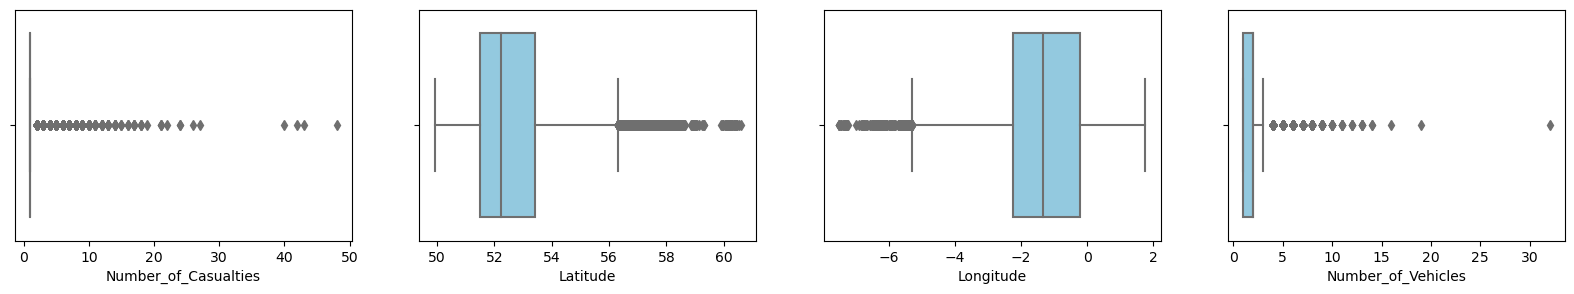

In [20]:
# Box Plot
fig, axs = plt.subplots(figsize=(20, 3), ncols=4)

sns.boxplot(x=df['Number_of_Casualties'], color='skyblue', ax=axs[0])
sns.boxplot(x=df['Latitude'], color='skyblue', ax=axs[1])
sns.boxplot(x=df['Longitude'], color='skyblue', ax=axs[2])
sns.boxplot(x=df['Number_of_Vehicles'], color='skyblue', ax=axs[3])

plt.show()

In [21]:
def remove_outliers_iqr(df, columns, threshold=1.5):
    q1 = df[columns].quantile(0.25)
    q3 = df[columns].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return df[((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

In [22]:
# Specify the columns you want to remove outliers from
columns_to_remove_outliers = ['Number_of_Casualties', 'Number_of_Vehicles', 'Latitude', 'Longitude']

In [23]:
# Remove outliers using the IQR method
new_data = remove_outliers_iqr(df, columns_to_remove_outliers)

In [24]:
new_data.shape

(78854, 19)

In [25]:
df.shape

(307973, 19)

In [26]:
# Remove outliers from the original DataFrame
df = df[~df.index.isin(new_data.index)]

# Print the DataFrame without outliers
print("Data without outliers:")
print(df)

Data without outliers:
       Day_of_Week              Junction_Control  \
0         Thursday      Give way or uncontrolled   
2           Sunday      Give way or uncontrolled   
3           Monday           Auto traffic signal   
4          Tuesday           Auto traffic signal   
6         Thursday      Give way or uncontrolled   
...            ...                           ...   
307676     Tuesday  Data missing or out of range   
307677    Saturday  Data missing or out of range   
307678      Monday  Data missing or out of range   
307679      Monday  Data missing or out of range   
307680    Thursday  Data missing or out of range   

                            Junction_Detail Accident_Severity   Latitude  \
0                   T or staggered junction           Serious  51.512273   
2                   T or staggered junction            Slight  51.486668   
3                   T or staggered junction           Serious  51.507804   
4                                Crossroads     

In [27]:
df.shape

(229119, 19)

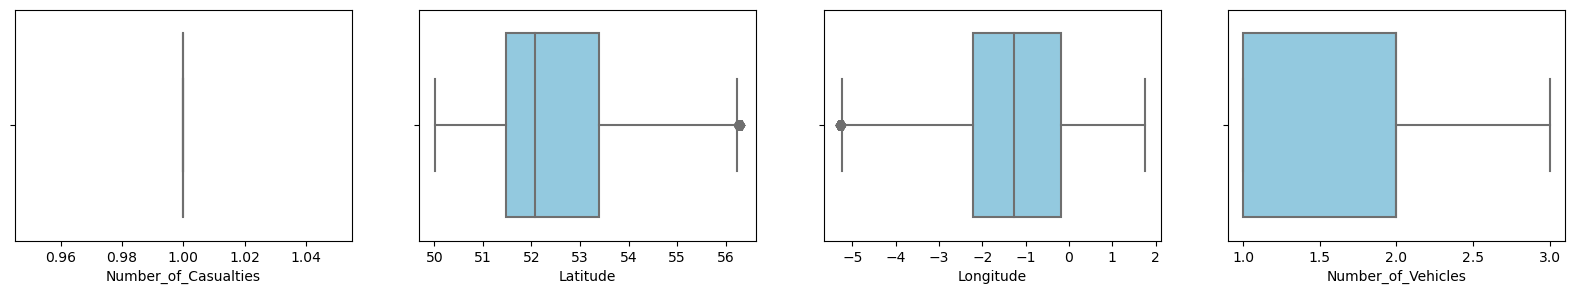

In [28]:
# Box Plot
fig, axs = plt.subplots(figsize=(20, 3), ncols=4)

sns.boxplot(x=df['Number_of_Casualties'], color='skyblue', ax=axs[0])
sns.boxplot(x=df['Latitude'], color='skyblue', ax=axs[1])
sns.boxplot(x=df['Longitude'], color='skyblue', ax=axs[2])
sns.boxplot(x=df['Number_of_Vehicles'], color='skyblue', ax=axs[3])

plt.show()

In [29]:
# convert the 'Date' column to datetime format
df['Time']= pd.to_datetime(df['Time'])

/var/folders/qc/1ys9gbw16vbg84gf2svymn6w0000gn/T/ipykernel_76201/3688853794.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Number_of_Casualties'], ax=axs[0])
/Users/pdo/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/qc/1ys9gbw16vbg84gf2svymn6w0000gn/T/ipykernel_76201/3688853794.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a fi

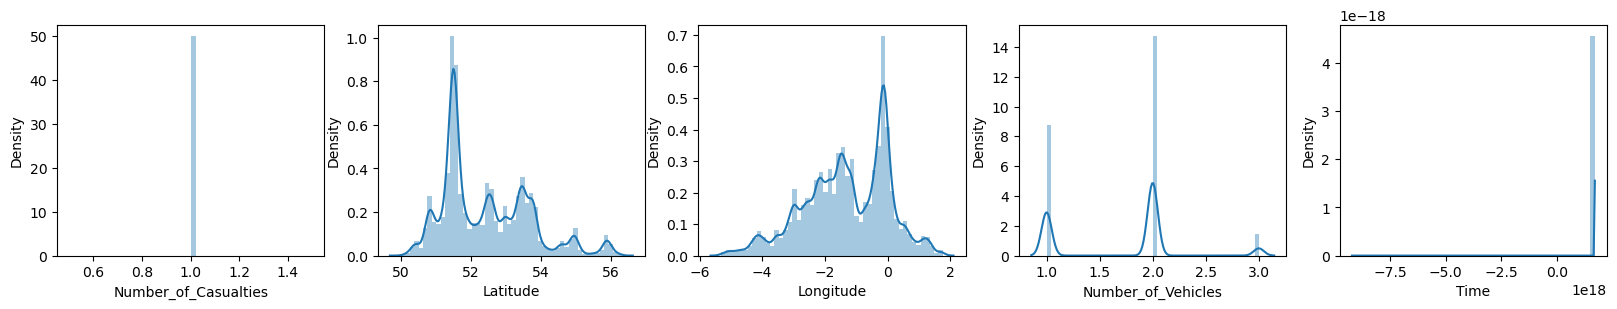

In [30]:
fig,axs=plt.subplots(figsize=(20,3),ncols=5)
sns.distplot(df['Number_of_Casualties'], ax=axs[0])
sns.distplot(df['Latitude'], ax=axs[1])
sns.distplot(df['Longitude'], ax=axs[2])
sns.distplot(df['Number_of_Vehicles'],ax=axs[3])
sns.distplot(df['Time'],ax=axs[4])
plt.show()

In [31]:
data = [df]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (df[col].value_counts())


Frequency of Categories for variable Day_of_Week
Friday       37715
Wednesday    35276
Tuesday      35265
Thursday     34636
Monday       33210
Saturday     29614
Sunday       23403
Name: Day_of_Week, dtype: int64

Frequency of Categories for variable Junction_Control
Give way or uncontrolled               113815
Data missing or out of range            71667
Auto traffic signal                     23996
Not at junction or within 20 metres     18038
Stop sign                                1168
Authorised person                         368
Auto traffic sigl                          67
Name: Junction_Control, dtype: int64

Frequency of Categories for variable Junction_Detail
Not at junction or within 20 metres    89457
T or staggered junction                74325
Roundabout                             21420
Crossroads                             21286
Private drive or entrance               8129
Other junction                          6112
More than 4 arms (not roundabout)       2954
Sl

In [32]:
df.shape

(229119, 19)

In [33]:
dummy_df = pd.get_dummies(df['Urban_or_Rural_Area'], prefix='Area')

In [34]:
df = pd.concat([df, dummy_df], axis=1)

In [35]:
df.drop('Urban_or_Rural_Area', axis=1, inplace=True)

In [36]:
df.drop('Area_Rural', axis=1, inplace=True)

In [37]:
df['Area_Urban'].unique()

array([1, 0], dtype=uint8)

In [38]:
df.groupby('Area_Urban').size()

Area_Urban
0     72546
1    156573
dtype: int64

In [39]:
df.head()

,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Weather_Conditions,Vehicle_Group,Area_Urban
0,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,2024-03-21 15:11:00,Fine no high winds,Group 1,1
2,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,2024-03-21 14:19:00,Fine no high winds,Group 1,1
3,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,2024-03-21 08:10:00,Other,Group 2,1
4,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,2024-03-21 17:25:00,Fine no high winds,Group 1,1
6,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.480177,Daylight,Kensington and Chelsea,None,-0.178561,1,2,Metropolitan Police,Dry,Single carriageway,30,2024-03-21 13:58:00,Fine no high winds,Group 2,1


In [40]:
df.columns

Index(['Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Weather_Conditions', 'Vehicle_Group', 'Area_Urban'],
      dtype='object')

In [41]:
df.describe(include="all")

/var/folders/qc/1ys9gbw16vbg84gf2svymn6w0000gn/T/ipykernel_76201/1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Weather_Conditions,Vehicle_Group,Area_Urban
count,229119,229119,229119,229119,229119.000000,229119,229119,229117,229119.000000,229119.0,229119.000000,229119,228865,227905,229119.000000,229117,224213,229119,229119.000000
unique,7,7,9,4,NaN,5,412,6,NaN,NaN,NaN,49,5,5,NaN,1439,8,6,NaN
top,Friday,Give way or uncontrolled,Not at junction or within 20 metres,Slight,NaN,Daylight,Birmingham,None,NaN,NaN,NaN,Metropolitan Police,Dry,Single carriageway,NaN,2024-03-21 17:00:00,Fine no high winds,Group 1,NaN
freq,37715,113815,89457,197739,NaN,170665,4507,225320,NaN,NaN,NaN,39440,158554,173303,NaN,2284,183140,182353,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-21 00:01:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-21 23:59:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,52.406133,NaN,NaN,NaN,-1.302654,1.0,1.707301,NaN,NaN,NaN,37.547890,NaN,NaN,NaN,0.683370
std,NaN,NaN,NaN,NaN,1.248358,NaN,NaN,NaN,1.333119,0.0,0.569231,NaN,NaN,NaN,13.301327,NaN,NaN,NaN,0.465163
min,NaN,NaN,NaN,NaN,50.003905,NaN,NaN,NaN,-5.309303,1.0,1.000000,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,51.477414,NaN,NaN,NaN,-2.202840,1.0,1.000000,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,0.000000


In [42]:
# convert the 'Date' column to datetime format
df['Time']= pd.to_datetime(df['Time'])

In [43]:
df.duplicated()

0         False
2         False
3         False
4         False
6         False
          ...  
307676    False
307677    False
307678    False
307679    False
307680    False
Length: 229119, dtype: bool

In [44]:
df_no_duplicates = df.drop_duplicates()


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Group 1'),
  Text(1, 0, 'Group 2'),
  Text(2, 0, 'Group 3'),
  Text(3, 0, 'Group 5'),
  Text(4, 0, 'Group 4'),
  Text(5, 0, 'Group 6')])

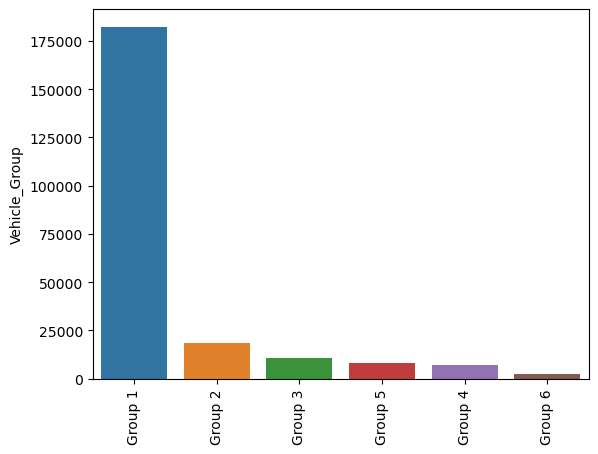

In [45]:
sns.barplot(x=df['Vehicle_Group'].unique(), y=df['Vehicle_Group'].value_counts(), data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Serious'),
  Text(1, 0, 'Slight'),
  Text(2, 0, 'Fetal'),
  Text(3, 0, 'Fatal')])

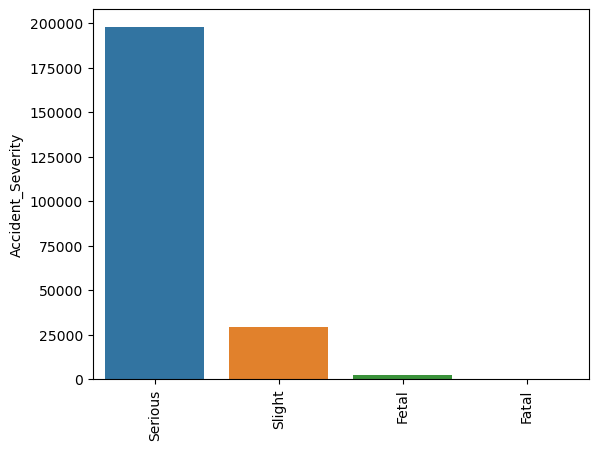

In [46]:
sns.barplot(x=df['Accident_Severity'].unique(), y=df['Accident_Severity'].value_counts(), data=df)
plt.xticks(rotation=90)

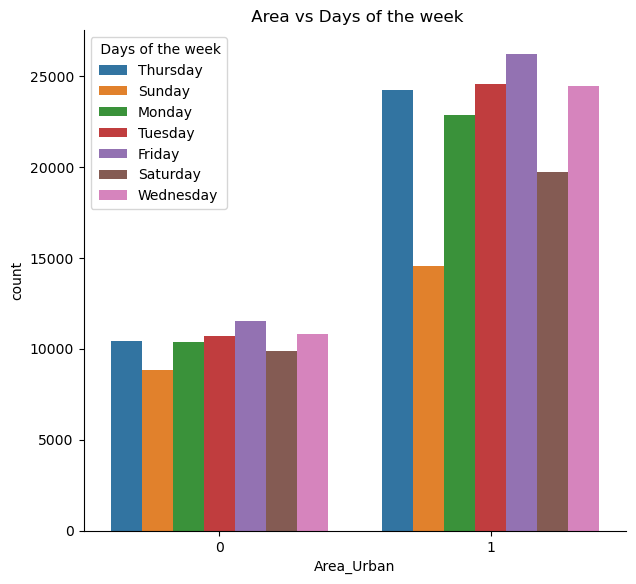

In [47]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'Area_Urban', hue = 'Day_of_Week', data = df) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = ' Days of the week')
plot1.axes.set_title(' Area vs Days of the week')

plt.show()

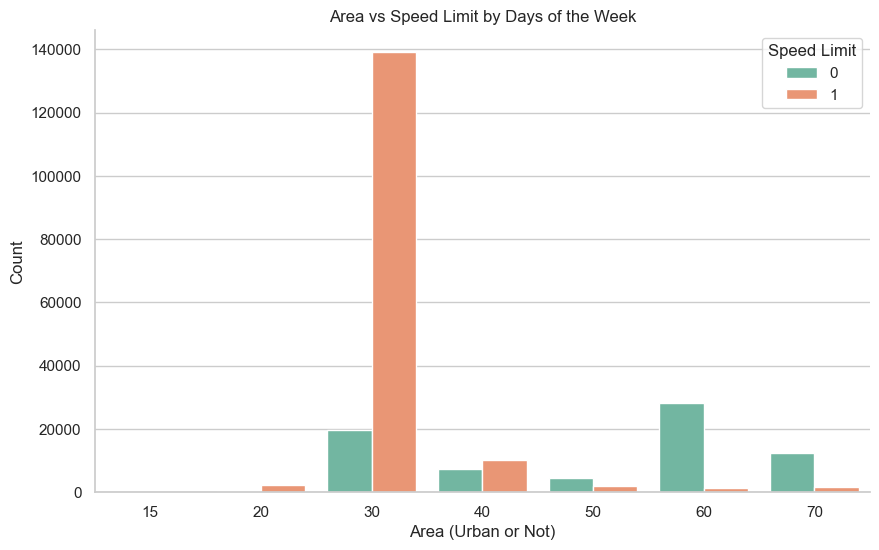

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Create a countplot with hue and Set2 color palette
plt.figure(figsize=(10, 6))
plot1 = sns.countplot(x='Speed_limit', hue='Area_Urban', data=df, palette='Set2')

# Add labels and title
plt.title('Area vs Speed Limit by Days of the Week')
plt.xlabel('Area (Urban or Not)')
plt.ylabel('Count')

# Add legend
plt.legend(title='Speed Limit', loc='upper right')

# Remove spines for cleaner look
sns.despine()

# Show the plot
plt.show()

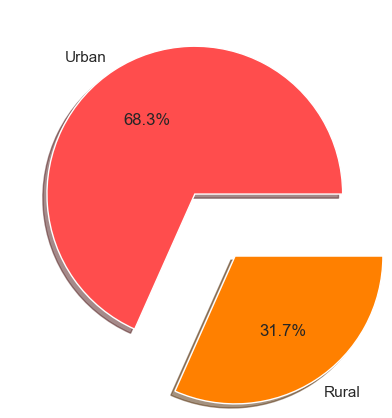

In [49]:
plt.pie(x=df['Area_Urban'].value_counts(),labels=['Urban','Rural'],explode=[0,0.5],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

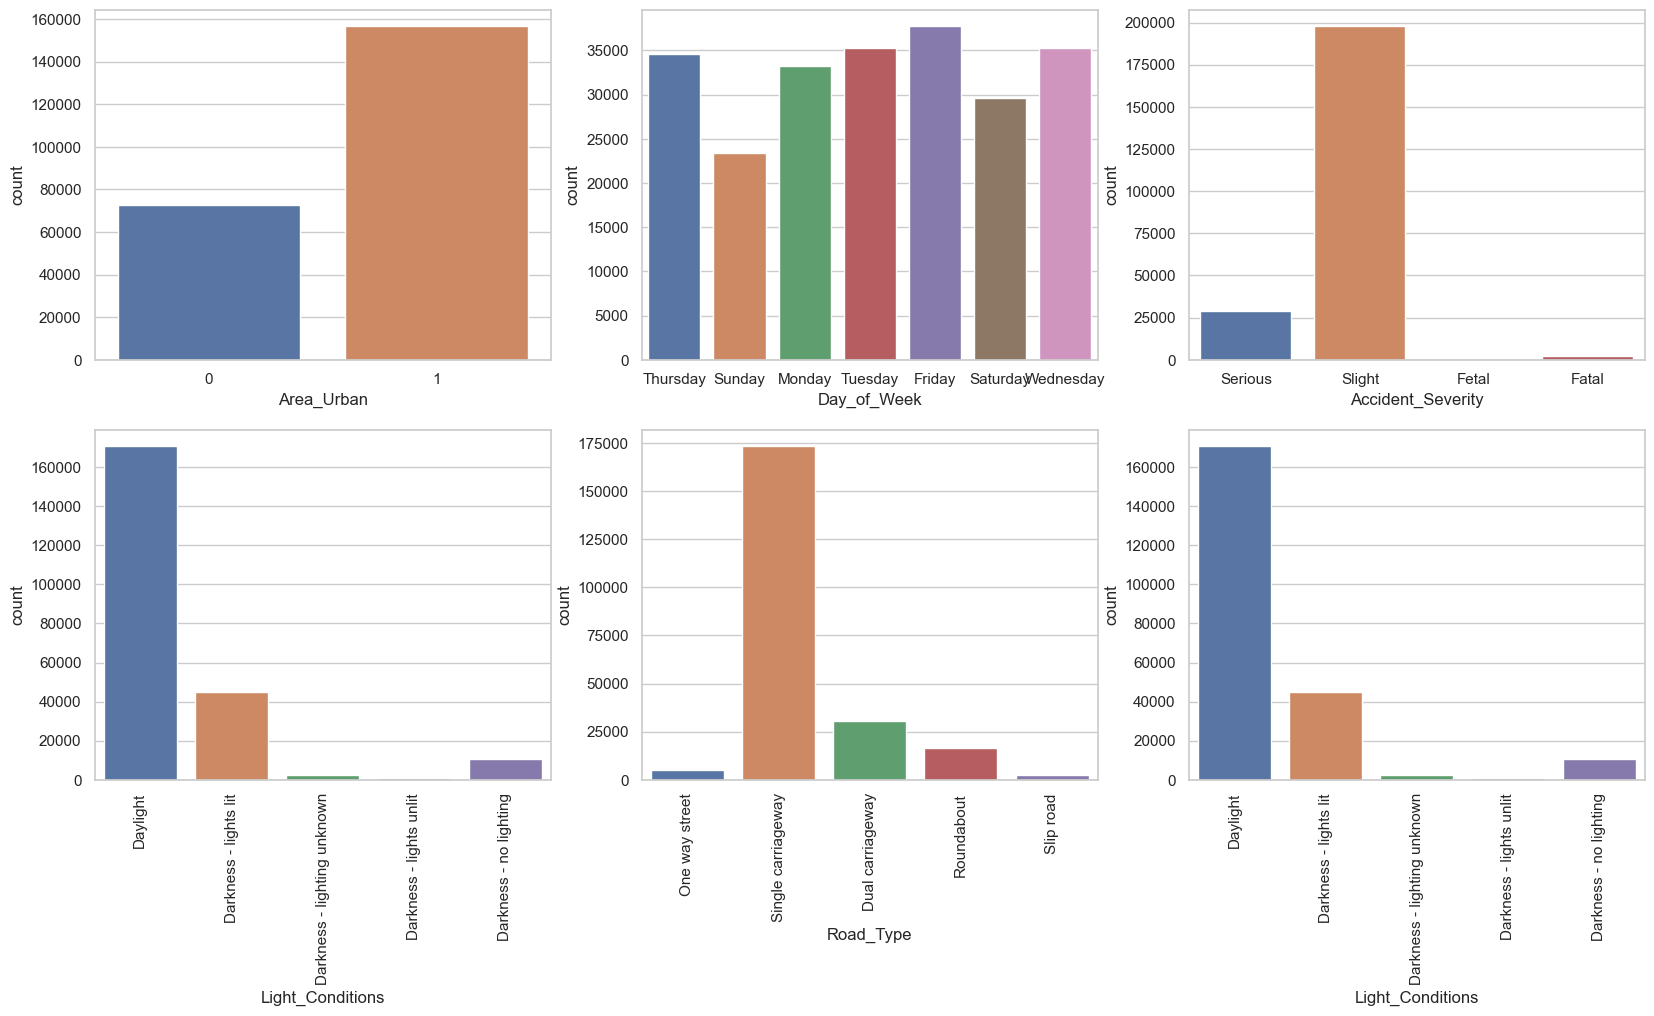

In [50]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='Area_Urban', data=df, ax=ax[0,0])
sns.countplot(x='Day_of_Week', data=df, ax=ax[0,1])
sns.countplot(x='Accident_Severity', data=df, ax=ax[0,2])
sns.countplot(x='Light_Conditions', data=df, ax=ax[1,0])
ax[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='Road_Type', data=df, ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
sns.countplot(x='Light_Conditions', data=df, ax=ax[1,2])
ax[1,2].tick_params(axis='x', rotation=90)

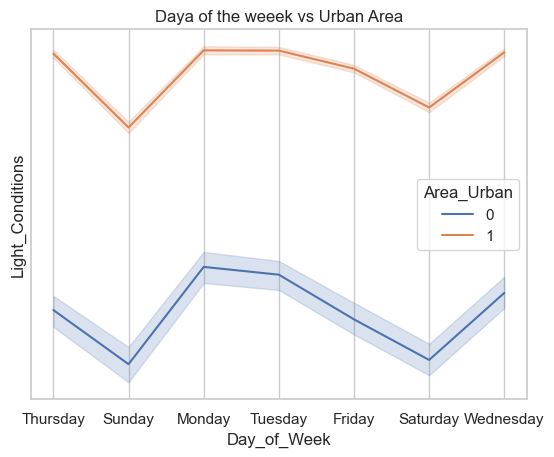

In [51]:
sns.lineplot(x = 'Day_of_Week', y = 'Light_Conditions', data = df, hue = 'Area_Urban')
plt.title('Daya of the weeek vs Urban Area') 
plt.show()

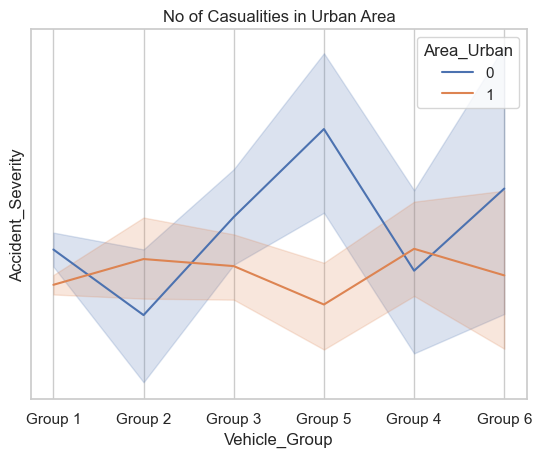

In [52]:
sns.lineplot(x = 'Vehicle_Group', y = 'Accident_Severity', data = df, hue = 'Area_Urban')
plt.title('No of Casualities in Urban Area') 
plt.show()

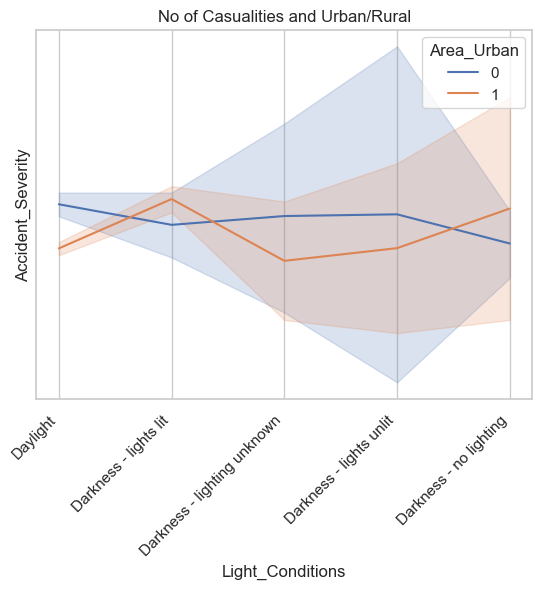

In [53]:
sns.lineplot(x = 'Light_Conditions', y = 'Accident_Severity', data = df, hue = 'Area_Urban')
plt.title('No of Casualities and Urban/Rural') 
plt.xticks(rotation=45, ha="right")
plt.show()

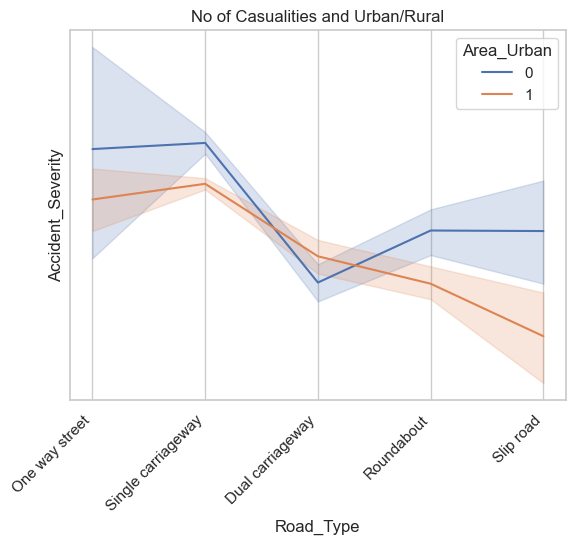

In [54]:
sns.lineplot(x = 'Road_Type', y = 'Accident_Severity', data = df, hue = 'Area_Urban')
plt.title('No of Casualities and Urban/Rural') 
plt.xticks(rotation=45, ha="right")
plt.show()

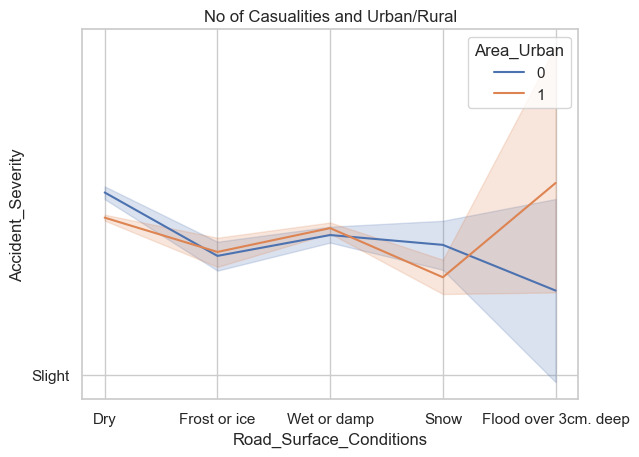

In [55]:
sns.lineplot(x = 'Road_Surface_Conditions', y = 'Accident_Severity', data = df, hue = 'Area_Urban')
plt.title('No of Casualities and Urban/Rural') 
plt.show()

/Users/pdo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


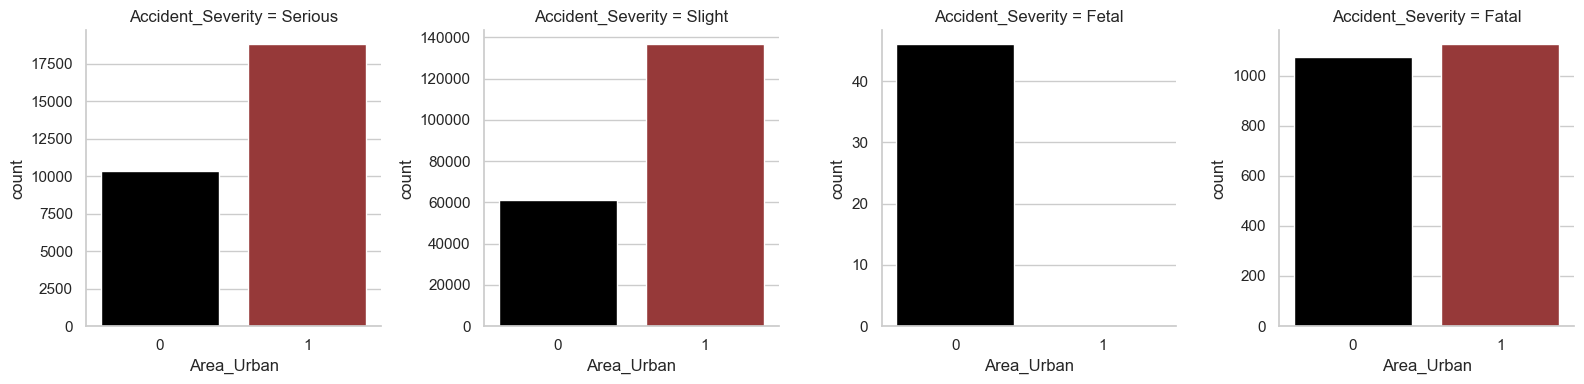

In [56]:
# creating a facet grid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=df, col='Accident_Severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Area_Urban', palette=['black', 'brown'])
plt.show()


/Users/pdo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


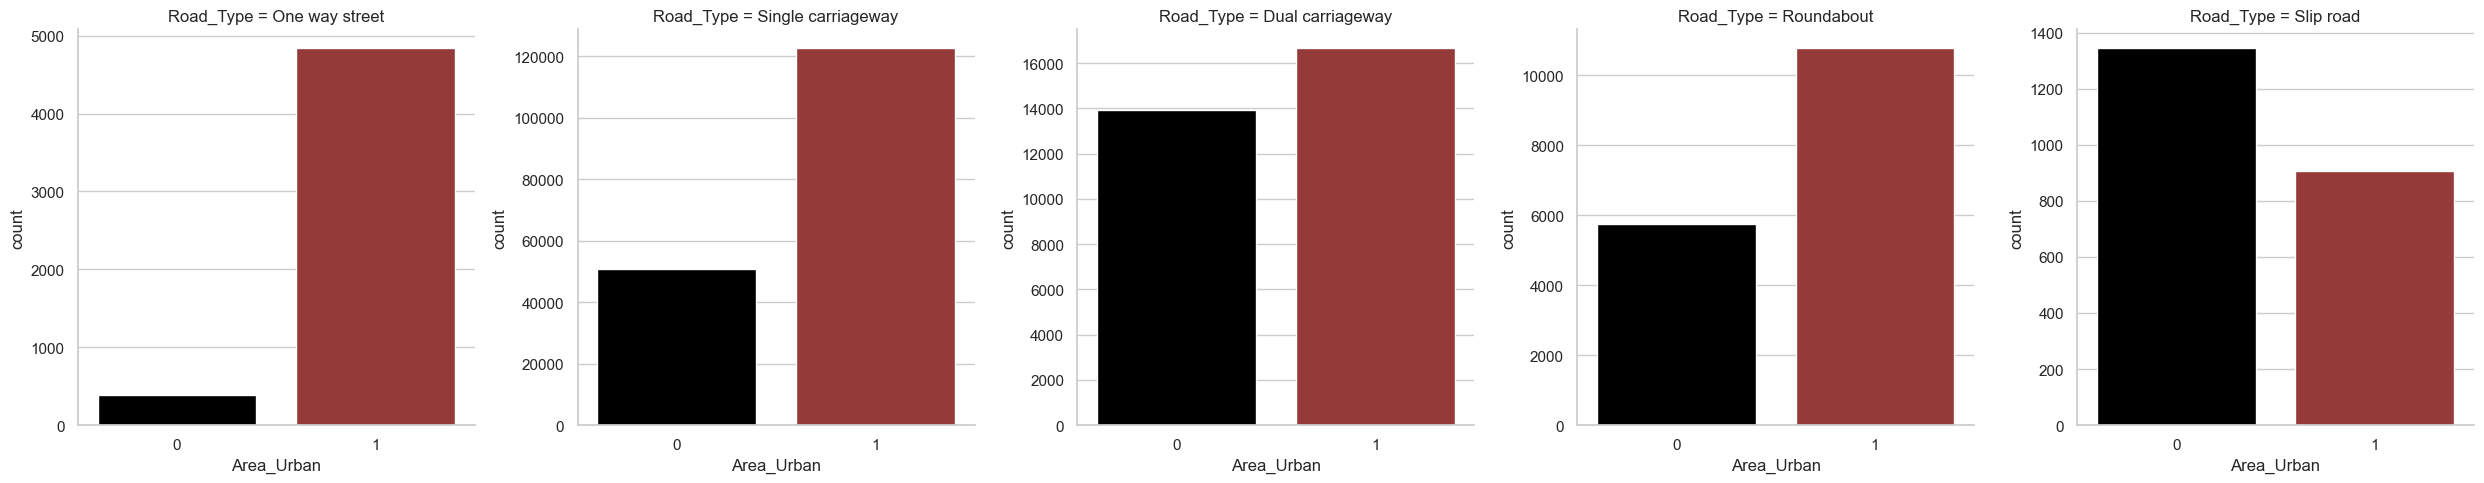

In [57]:
# creating a facet grid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=df, col='Road_Type', height=5, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Area_Urban', palette=['black', 'brown'])
plt.show()

<Axes: xlabel='Accident_Severity', ylabel='count'>

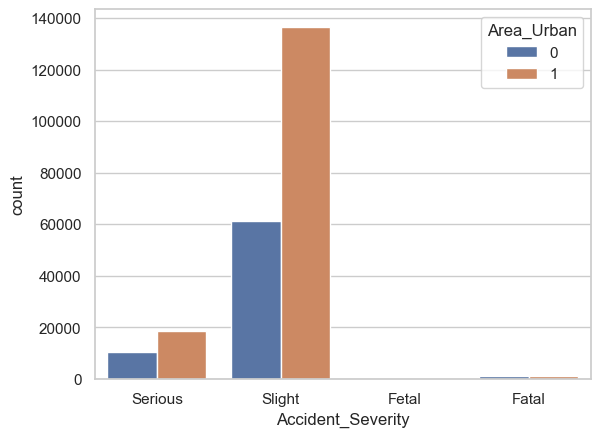

In [58]:
sns.countplot(x=df['Accident_Severity'],hue=df['Area_Urban'])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

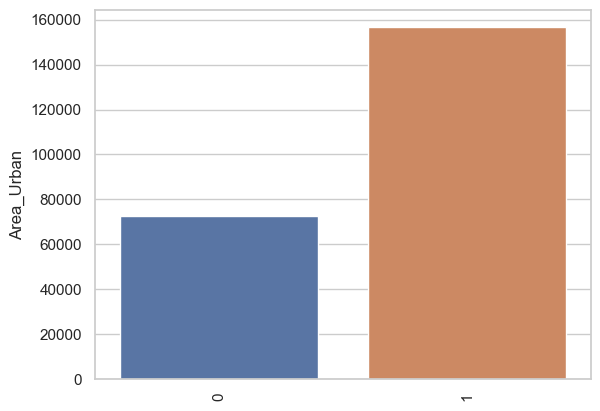

In [59]:
sns.barplot(x=df['Area_Urban'].unique(), y=df['Area_Urban'].value_counts(), data=df)
plt.xticks(rotation=90)

In [60]:
# checking for null values
df.isnull().sum()

Day_of_Week                      0
Junction_Control                 0
Junction_Detail                  0
Accident_Severity                0
Latitude                         0
Light_Conditions                 0
Local_Authority_(District)       0
Carriageway_Hazards              2
Longitude                        0
Number_of_Casualties             0
Number_of_Vehicles               0
Police_Force                     0
Road_Surface_Conditions        254
Road_Type                     1214
Speed_limit                      0
Time                             2
Weather_Conditions            4906
Vehicle_Group                    0
Area_Urban                       0
dtype: int64

In [61]:
df.dropna(inplace=True)

In [62]:
df.isnull().sum()

Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Weather_Conditions            0
Vehicle_Group                 0
Area_Urban                    0
dtype: int64

/var/folders/qc/1ys9gbw16vbg84gf2svymn6w0000gn/T/ipykernel_76201/1001107408.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().round(2)


<Axes: >

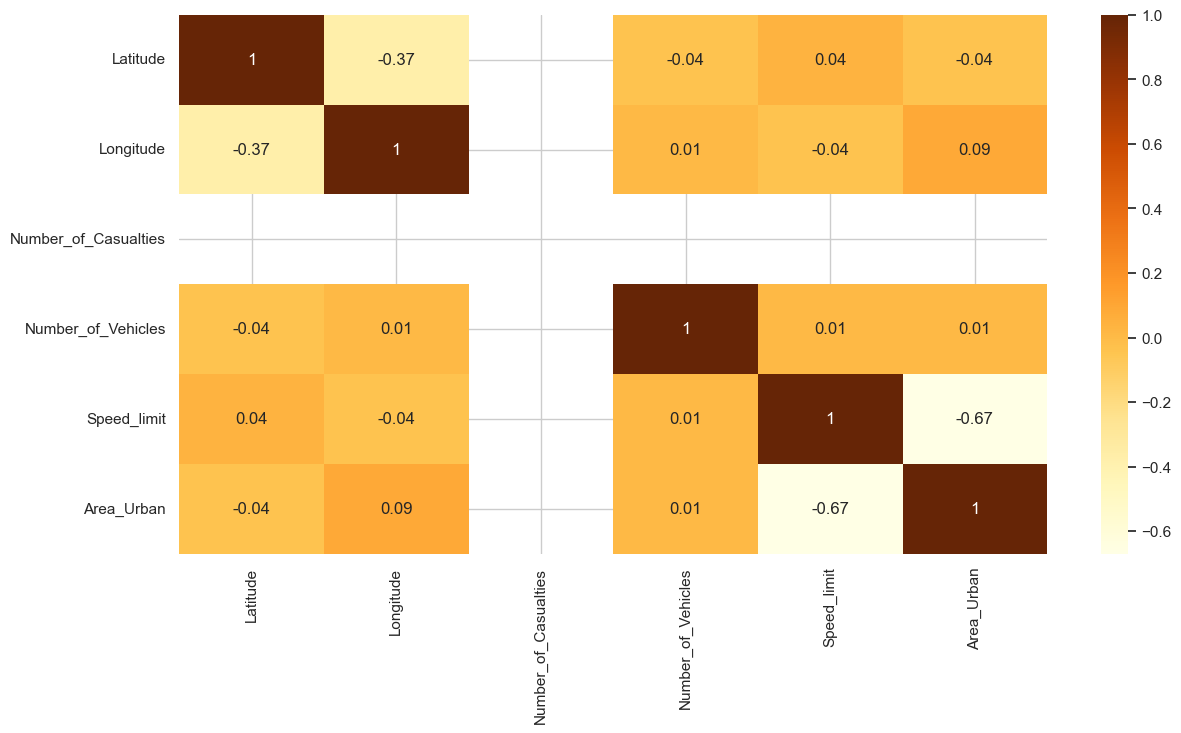

In [63]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [64]:
correlation = df.corr().abs().round(2)

# Flatten the correlation matrix and sort the values
sorted_corr_values = correlation.unstack().sort_values(ascending=False)

# Remove duplicate pairs (since correlation matrix is symmetric)
sorted_corr_values = sorted_corr_values[sorted_corr_values.index.get_level_values(0) != sorted_corr_values.index.get_level_values(1)]

# Display the sorted correlation values
print(sorted_corr_values)


Area_Urban            Speed_limit             0.67
Speed_limit           Area_Urban              0.67
Latitude              Longitude               0.37
Longitude             Latitude                0.37
Area_Urban            Longitude               0.09
Longitude             Area_Urban              0.09
Speed_limit           Latitude                0.04
Area_Urban            Latitude                0.04
Latitude              Number_of_Vehicles      0.04
Speed_limit           Longitude               0.04
Latitude              Area_Urban              0.04
Number_of_Vehicles    Latitude                0.04
Longitude             Speed_limit             0.04
Latitude              Speed_limit             0.04
Number_of_Vehicles    Speed_limit             0.01
Speed_limit           Number_of_Vehicles      0.01
Number_of_Vehicles    Longitude               0.01
Longitude             Number_of_Vehicles      0.01
Area_Urban            Number_of_Vehicles      0.01
Number_of_Vehicles    Area_Urba

/var/folders/qc/1ys9gbw16vbg84gf2svymn6w0000gn/T/ipykernel_76201/3901313517.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().abs().round(2)


In [103]:
df.head()

,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Weather_Conditions,Vehicle_Group,Area_Urban
0,4,4,8,2,57477,4,180,1,-0.201349,0,1,28,0,1,2,910,1,0,1
2,3,4,8,3,51627,4,180,1,-0.179599,0,1,28,0,3,2,858,1,0,1
3,1,2,8,2,56281,4,180,1,-0.203110,0,1,28,2,3,2,489,3,1,1
4,5,2,0,2,50696,1,180,1,-0.173445,0,1,28,0,3,2,1044,1,0,1
6,4,4,8,2,50258,4,180,1,-0.178561,0,1,28,0,3,2,837,1,1,1


In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [66]:
df['Day_of_Week']= le.fit_transform(df['Day_of_Week'])
df['Junction_Control']= le.fit_transform(df['Junction_Control'])
df['Junction_Detail']= le.fit_transform(df['Junction_Detail'])
df['Accident_Severity']= le.fit_transform(df['Accident_Severity'])
df['Latitude']= le.fit_transform(df['Latitude'])
df['Light_Conditions']= le.fit_transform(df['Light_Conditions'])
df['Local_Authority_(District)']= le.fit_transform(df['Local_Authority_(District)'])
df['Carriageway_Hazards']= le.fit_transform(df['Carriageway_Hazards'])
df['Number_of_Casualties']= le.fit_transform(df['Number_of_Casualties'])
df['Number_of_Vehicles']= le.fit_transform(df['Number_of_Vehicles'])
df['Police_Force']= le.fit_transform(df['Police_Force'])
df['Road_Surface_Conditions']= le.fit_transform(df['Road_Surface_Conditions'])
df['Road_Type']= le.fit_transform(df['Road_Type'])
df['Speed_limit']= le.fit_transform(df['Speed_limit'])
df['Time']= le.fit_transform(df['Time'])
df['Weather_Conditions']= le.fit_transform(df['Weather_Conditions'])
df['Area_Urban']= le.fit_transform(df['Area_Urban'])
df['Vehicle_Group']= le.fit_transform(df['Vehicle_Group'])

In [104]:
#Let's store readmitted in y and rest of the columns in X,

Y = df['Area_Urban']
X = df.drop(['Area_Urban'], axis =1)
X = pd.get_dummies(X)

In [105]:
print(X)

        Day_of_Week  Junction_Control  Junction_Detail  Accident_Severity  \
0                 4                 4                8                  2   
2                 3                 4                8                  3   
3                 1                 2                8                  2   
4                 5                 2                0                  2   
6                 4                 4                8                  2   
...             ...               ...              ...                ...   
307676            5                 3                3                  3   
307677            2                 3                3                  3   
307678            1                 3                3                  3   
307679            1                 3                3                  3   
307680            4                 3                3                  3   

        Latitude  Light_Conditions  Local_Authority_(District)  \
0        

In [71]:
Y

0         1
2         1
3         1
4         1
6         1
         ..
307676    1
307677    1
307678    0
307679    0
307680    0
Name: Area_Urban, Length: 223100, dtype: int64

In [98]:
classifier = LogisticRegression()


In [99]:
classifier.fit(X_train, Y_train)


LogisticRegression()

In [100]:
from sklearn.metrics import accuracy_score

X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print(f"Accuracy on Training Data: {training_data_accuracy * 100:.2f}%")


Accuracy on Training Data: 81.14%


In [101]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [102]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8126848946660691


In [109]:
input_data = (5,-3.315171,72,19,175,-0.201349,57477,180,180,-3.583725,260,50258,4,3,5,260,8,829 )

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not stay in Area_Urban')
else:
  print('The person stays in Area_Urban')

[1]
The person stays in Area_Urban


/Users/pdo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [110]:
import pickle

In [111]:
filename = 'RoadAccident_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [112]:
# loading the saved model
loaded_model = pickle.load(open('RoadAccident_model.sav', 'rb'))

In [113]:
input_data = (5,-3.315171,72,19,175,-0.201349,57477,180,180,-3.583725,260,50258,4,3,5,260,8,829 )

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not stay in Area_Urban')
else:
  print('The person stays in Area_Urban')

[1]
The person stays in Area_Urban


/Users/pdo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [114]:
for column in X.columns:
  print(column)

Day_of_Week
Junction_Control
Junction_Detail
Accident_Severity
Latitude
Light_Conditions
Local_Authority_(District)
Carriageway_Hazards
Longitude
Number_of_Casualties
Number_of_Vehicles
Police_Force
Road_Surface_Conditions
Road_Type
Speed_limit
Time
Weather_Conditions
Vehicle_Group


In [ ]:
import os
import pickle
import streamlit as st

# Set page configuration
st.set_page_config(page_title="Airline Satisfaction",
                   layout="wide",
                   page_icon="✈️")

# Load the saved model
Airline_model = pickle.load(open('/Users/pdo/Downloads/Airline End to End/saved_model/Airline Passenger_model.sav', 'rb'))

# Sidebar for navigation
st.sidebar.title("Navigation")
# You can add your sidebar navigation items here

# Main content
st.title('Airline Satisfaction Prediction using ML')

col1, col2, col3 = st.columns(3)

with col1:
    Gender = st.selectbox('Gender', ['Male', 'Female'])

with col2:
    Age = st.number_input('Age', step=1,min_value=0)

with col3:
    CustomerType = st.selectbox('Customer Type', ['Returning', 'First-time'])

with col1:
    TypeOfTravel = st.selectbox('Type of Travel', ['Personal', 'Business'])

with col2:
    Class = st.selectbox('Class', ['Economy', 'Economy Plus', 'Business'])

with col3:
    FlightDistance = st.number_input('Flight Distance', step=1, min_value=0)

with col1:
    DepartureDelay = st.number_input('Departure Delay in Minutes', step=1, min_value=0)

with col2:
    ArrivalDelay = st.number_input('Arrival Delay in Minutes', step=1, min_value=0)

with col3:
    OnlineBoarding = st.slider('Online Boarding Rating', 1, 5)

with col1:
    InFlightService = st.slider('In-flight Service Rating', 1, 5)

with col2:
    InFlightWifiService = st.slider('In-flight Wifi Service Rating', 1, 5)
    
Airline_prediction = ''
# Assuming all input features are correctly captured for the model's expected input

if st.button('Predict Satisfaction'):

    # Prepare user input for prediction
    # Make sure to preprocess the inputs as required by your model
    # This could involve scaling numerical features or encoding categorical features as you trained your model
    user_input = [Gender, Age, CustomerType, TypeOfTravel, Class, FlightDistance,
                  DepartureDelay, ArrivalDelay, OnlineBoarding, InFlightService, InFlightWifiService]

    # Convert categorical data and preprocess as per your model training phase
    # Example: user_input_processed = preprocess(user_input)

    # Assuming user_input is ready for prediction after necessary preprocessing
    satisfaction_prediction = Airline_model.predict([user_input])

    # Displaying the prediction result
    if satisfaction_prediction[0] == 1:
       Airline_prediction = 'The passenger is Satisfied.'
    else:
        Airline_prediction = 'The passenger is Neutral or Dissatisfied.'
    st.success(Airline_prediction)

# Note: Ensure the preprocess function is defined or the necessary preprocessing steps are applied
# according to how the model was trained. The above code assumes categorical variables are handled accordingly.
